## 0. Install Dependecies

In [4]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 514.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Set device to GPU if is available otherwise set device as cpu**

In [7]:
import torch
# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


**Import libraries**

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

##1. Dataset##

- The Datatset used in this project was generated using the Mujoco simulator with three different configurations:
- 2D (2 joints)
- 2D (3 joints)
- 3D (5 joints)

The format of the data is in CSV format, including information about Joint angles, fingertip position, and orientation.


1.1. Visualise data from the simulator

In [1]:
!head -5 logfiler2.csv

j0;j1;cos(j0);cos(j1);sin(j0);sin(j1);ft_x;ft_y;ft_qw;ft_qz
 0.055; -0.012;  0.998;  1.000;  0.055; -0.012;  0.210;  0.010;  1.000;  0.021
 0.076; -0.017;  0.997;  1.000;  0.076; -0.017;  0.210;  0.014;  1.000;  0.030
 0.148; -0.011;  0.989;  1.000;  0.147; -0.011;  0.208;  0.030;  0.998;  0.068
 0.214;  0.048;  0.977;  0.999;  0.212;  0.048;  0.204;  0.050;  0.991;  0.131


In [2]:
!head -5 logfiler3.csv

j0;j1;j2;cos(j0);cos(j1);cos(j2);sin(j0);sin(j1);sin(j2);ft_x;ft_y;ft_qw;ft_qz
 0.055; -0.012;  0.072;  0.998;  1.000;  0.997;  0.055; -0.012;  0.072;  0.309;  0.022;  0.998;  0.057
 0.076; -0.017;  0.100;  0.997;  1.000;  0.995;  0.076; -0.017;  0.100;  0.308;  0.031;  0.997;  0.080
 0.135; -0.059;  0.194;  0.991;  0.998;  0.981;  0.135; -0.059;  0.193;  0.305;  0.050;  0.991;  0.135
 0.228; -0.110;  0.295;  0.974;  0.994;  0.957;  0.226; -0.109;  0.290;  0.297;  0.079;  0.979;  0.205


In [3]:
!head -5 logfiler5.csv

j0;j1;j2;j3;j4;cos(j0);cos(j1);cos(j2);cos(j3);cos(j4);sin(j0);sin(j1);sin(j2);sin(j3);sin(j4);ft_x;ft_y;ft_z;ft_qw;ft_qx;ft_qy;ft_qz
 0.000;  0.000;  0.000;  0.000;  0.000;  1.000;  1.000;  1.000;  1.000;  1.000;  0.000;  0.000;  0.000;  0.000;  0.000;  0.000;  0.000;  0.590;  1.000;  0.000;  0.000;  0.000
 0.022; -0.005;  0.028;  0.016; -0.032;  1.000;  1.000;  1.000;  1.000;  0.999;  0.022; -0.005;  0.028;  0.016; -0.032;  0.011;  0.004;  0.590;  1.000; -0.016;  0.019;  0.011
 0.103;  0.005;  0.107;  0.017; -0.100;  0.995;  1.000;  0.994;  1.000;  0.995;  0.102;  0.005;  0.106;  0.017; -0.099;  0.041;  0.016;  0.587;  0.995; -0.053;  0.061;  0.054
 0.209;  0.067;  0.216;  0.013; -0.174;  0.978;  0.998;  0.977;  1.000;  0.985;  0.208;  0.067;  0.215;  0.013; -0.173;  0.100;  0.042;  0.573;  0.979; -0.101;  0.138;  0.116


1.2. Preprocess the data


2R Robot

In [12]:
# Load dataset
data = pd.read_csv('logfiler2.csv', delimiter=';')

# Preprocessing: Extract inputs (joint angles and their trigonometric functions) and outputs (fingertip positions and quaternions)
X = data[['j0', 'j1', 'cos(j0)', 'cos(j1)', 'sin(j0)', 'sin(j1)']].values
y = data[['ft_x', 'ft_y', 'ft_qw', 'ft_qz']].values

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##2. Train Forward Kinematics Models##



### 2.1. Robot 2R

- Define the architecture of the model (Feedforward Neural Network) to learn forward kinematics.




In [15]:
# Define the feedforward neural network model
class ForwardKinematicsNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ForwardKinematicsNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [30]:
# Hyperparameters
hidden_dim = 128  # Number of neurons in hidden layers
learning_rate = 0.001
batch_size = 64
epochs = 200
accuracy_threshold = 0.01  # Define accuracy threshold (e.g., 0.01 for close predictions)

In [17]:
# Model
model = ForwardKinematicsNN(input_dim=X_train.shape[1], hidden_dim=hidden_dim, output_dim=y_train.shape[1])

- Loss Function

In [18]:
criterion = nn.MSELoss()

- Choose a Solver (Optimizer)

In [19]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

- Split the data into training and testing sets

In [20]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

- Train the models on joint angle inputs to predict fingertip positions.

In [27]:
# Lists to store losses and accuracies for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [28]:
# Accuracy function (percentage of predictions within a threshold)
def compute_accuracy(predictions, targets, threshold):
    with torch.no_grad():
        # Calculate absolute error
        error = torch.abs(predictions - targets)
        # Calculate how many predictions are within the threshold
        correct = (error < threshold).all(dim=1)  # Check if all dimensions are within the threshold
        return correct.float().mean().item()  # Mean accuracy

In [31]:
# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    train_accuracy = compute_accuracy(outputs, y_train, accuracy_threshold)

    # Validation step
    model.eval()
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    val_accuracy = compute_accuracy(val_outputs, y_val, accuracy_threshold)

    # Store losses and accuracies for plotting
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print every 10th epoch
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy*100:.2f}%, "
              f"Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

Epoch [10/200], Training Loss: 0.0001, Training Accuracy: 33.06%, Validation Loss: 0.0001, Validation Accuracy: 33.17%
Epoch [20/200], Training Loss: 0.0001, Training Accuracy: 35.01%, Validation Loss: 0.0001, Validation Accuracy: 34.92%
Epoch [30/200], Training Loss: 0.0001, Training Accuracy: 37.00%, Validation Loss: 0.0001, Validation Accuracy: 36.89%
Epoch [40/200], Training Loss: 0.0001, Training Accuracy: 38.99%, Validation Loss: 0.0001, Validation Accuracy: 38.47%
Epoch [50/200], Training Loss: 0.0001, Training Accuracy: 40.90%, Validation Loss: 0.0001, Validation Accuracy: 40.28%
Epoch [60/200], Training Loss: 0.0001, Training Accuracy: 42.83%, Validation Loss: 0.0001, Validation Accuracy: 42.55%
Epoch [70/200], Training Loss: 0.0001, Training Accuracy: 44.64%, Validation Loss: 0.0001, Validation Accuracy: 44.32%
Epoch [80/200], Training Loss: 0.0001, Training Accuracy: 46.50%, Validation Loss: 0.0001, Validation Accuracy: 45.98%
Epoch [90/200], Training Loss: 0.0001, Training 

In [32]:
# Testing the model
model.eval()
test_outputs = model(X_test)
test_loss = criterion(test_outputs, y_test)
test_accuracy = compute_accuracy(test_outputs, y_test, accuracy_threshold)
print(f"Test MSE: {test_loss.item():.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

Test MSE: 0.0000, Test Accuracy: 64.32%


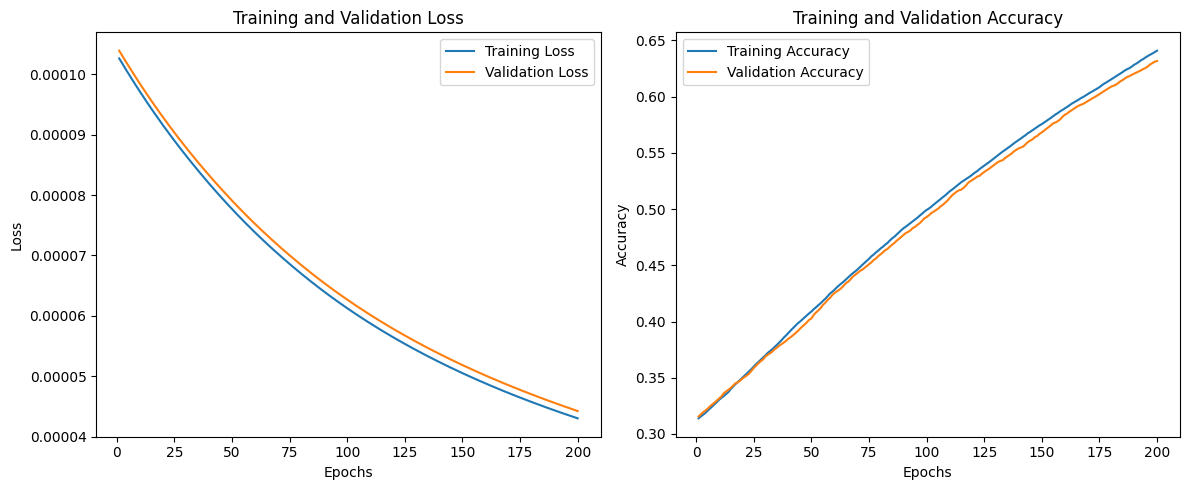

In [35]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- Hyperparameter Search

##3. Compare Jacobians##



3.1. Compute the Jacobian matrix for the learned forward kinematics using automatic differentiation.



3.2. Compare the computed Jacobian with the analytical Jacobian for the 2-joint robot.